## Financial Risk for Loan Approval

## Synthetic Dataset for Risk Assessment and Loan Approval Modeling

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?utm_source=chatgpt.com&select=Loan.csv

*This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

*`Risk Score Regression`: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

>-`Binary Classification`: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

In [66]:
# For data wrangling
import numpy as np
import pandas as pd

Data

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?select=Loan.csv

In [67]:
loan_df=pd.read_csv("Loan.csv")
loan_df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


## Step -1 Understanding the Data


In [68]:
loan_df.shape

(20000, 36)

In [69]:
print("The Features of the Dataset are :")
features_list = [feature for feature in loan_df.columns]
for feature in features_list:
    print(feature)

The Features of the Dataset are :
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

In [70]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [71]:
loan_df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [72]:
loan_df.describe(include="O")

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,2018-01-01,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


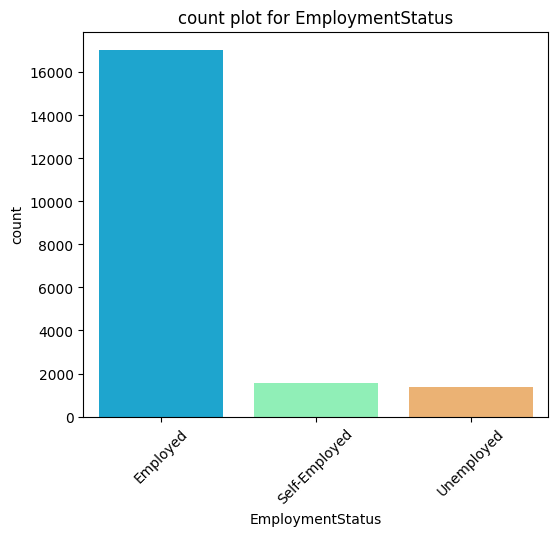

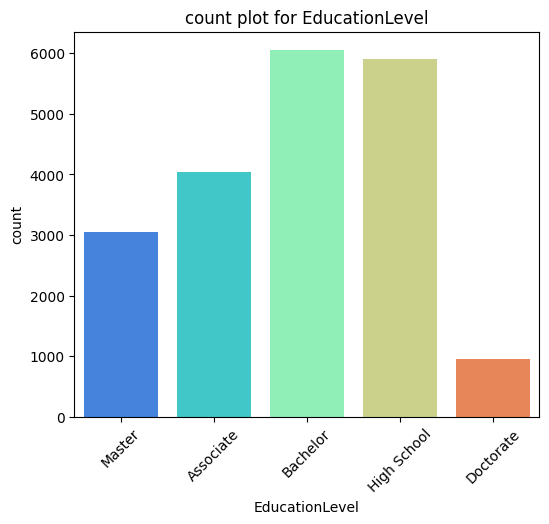

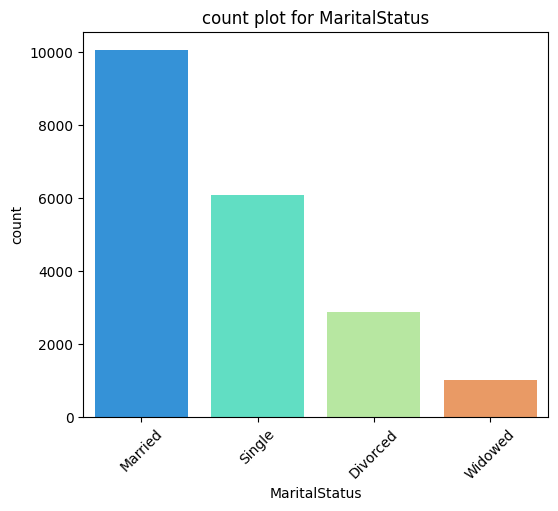

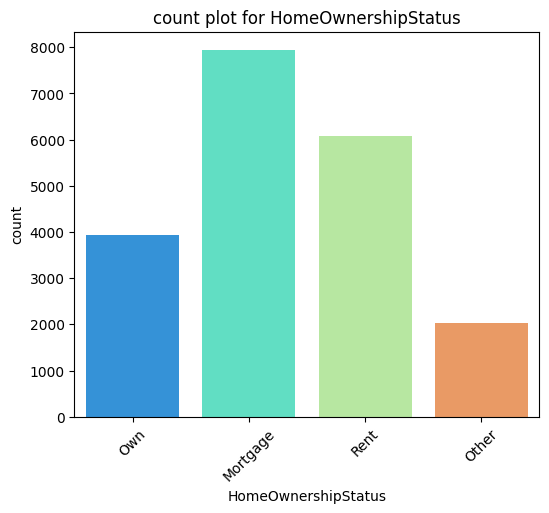

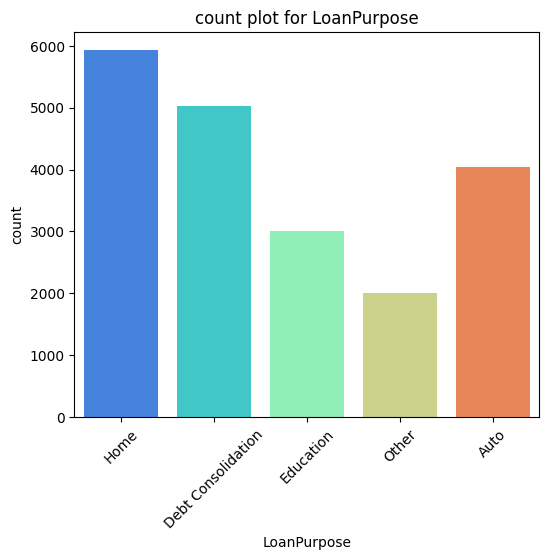

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns= loan_df.select_dtypes(include=["object","category"]).columns.tolist()
for col in categorical_columns[1:]: # SKIP THE FIRST FEATURE
    plt.figure(figsize=(6,5))
    sns.countplot(data=loan_df,x=col,hue=col,palette="rainbow",)
    plt.title(f"count plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

## Insights
Most of the loan needed persons are :
1. Employed
2. Married
3. Comparatively less educated
4. Need loan for building home

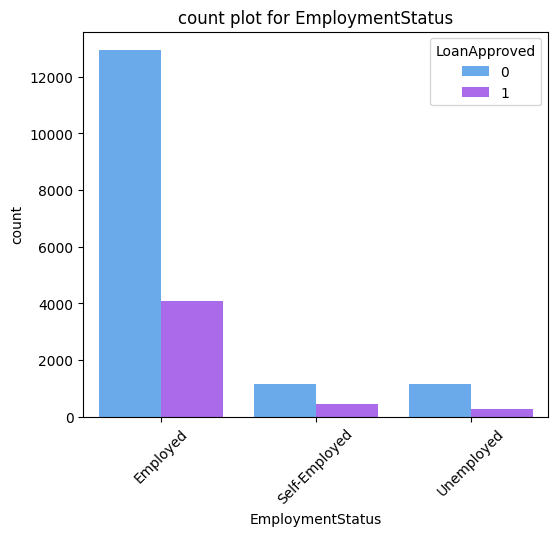

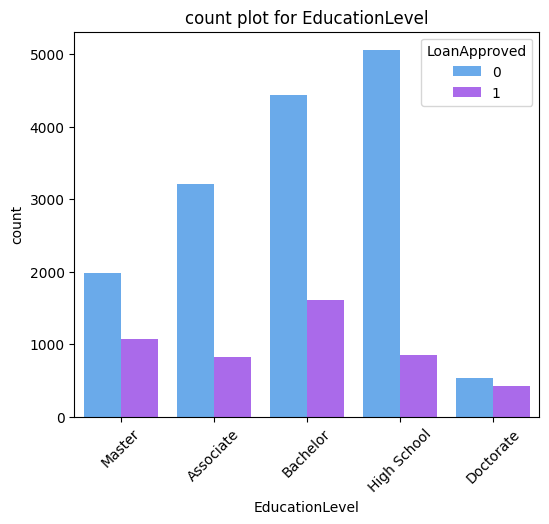

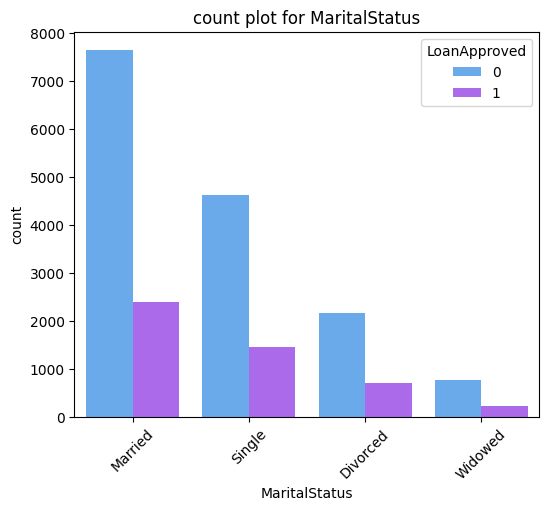

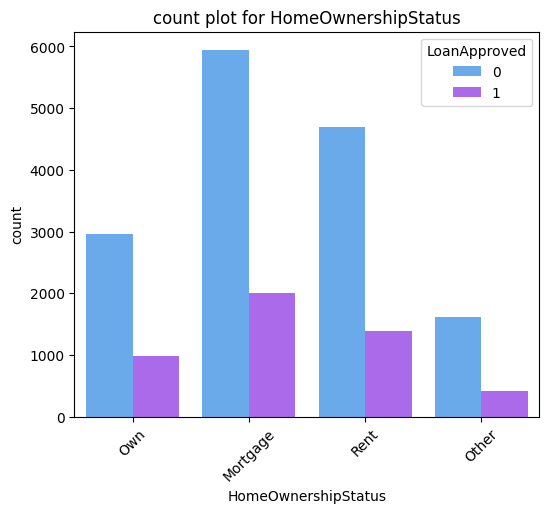

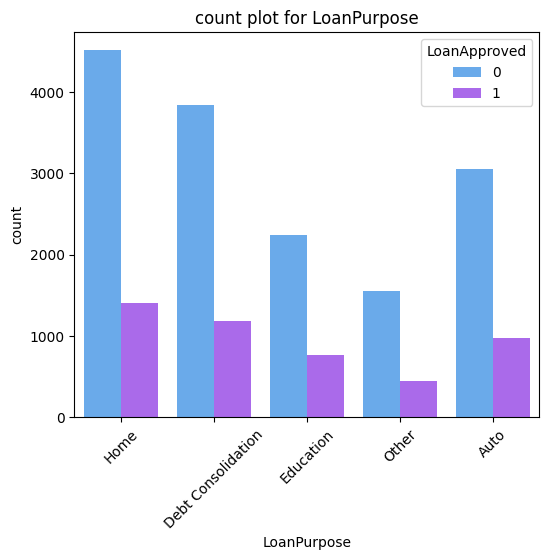

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns= loan_df.select_dtypes(include=["object","category"]).columns.tolist()
for col in categorical_columns[1:]: # SKIP THE FIRST FEATURE
    plt.figure(figsize=(6,5))
    sns.countplot(data=loan_df,x=col,hue="LoanApproved",palette="cool")
    plt.title(f"count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()

## Insights
1. Majority of loan requests are rejected in all categories (There might be some other reason affecting the riskscore).

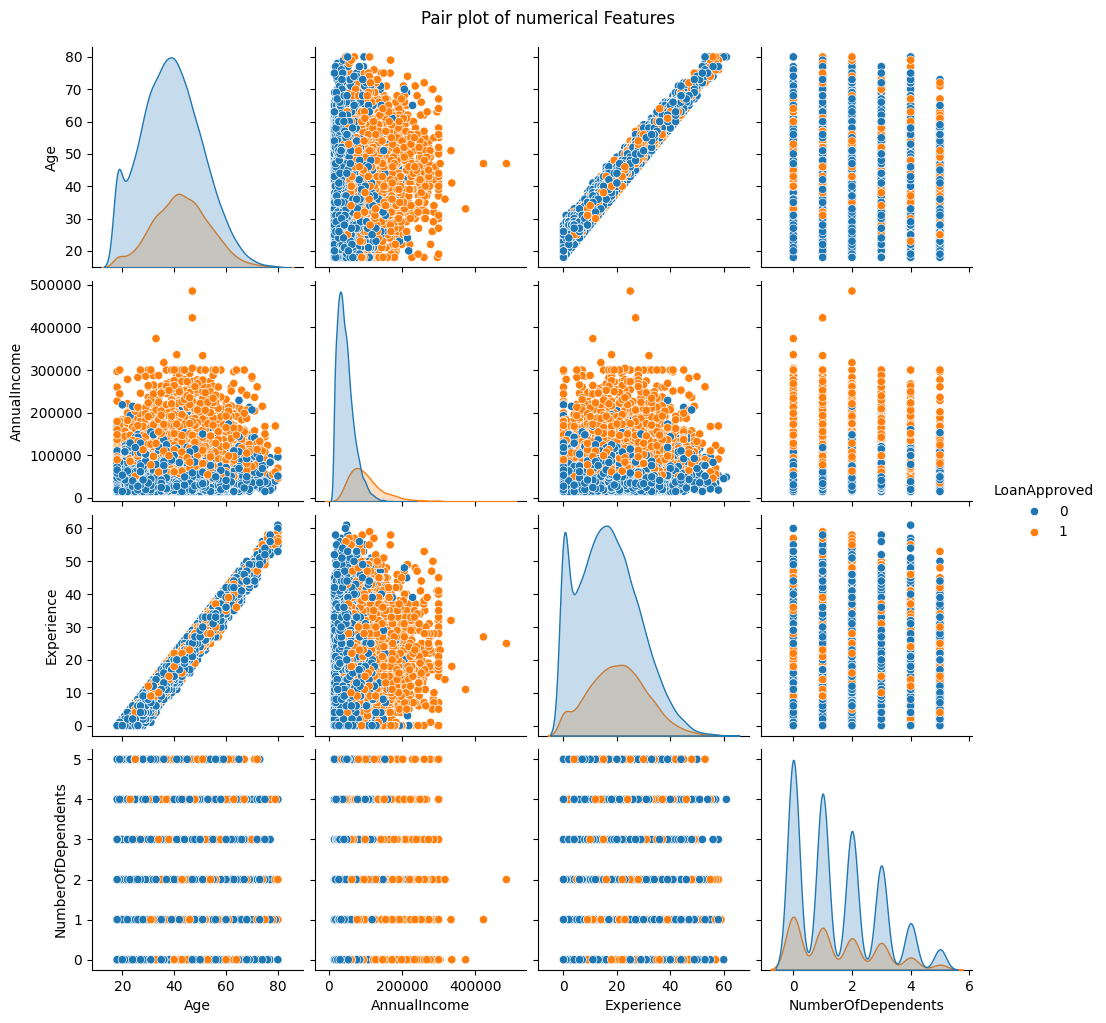

In [75]:
# Multivariate analysis : Pair plot for numerical features(personal deatails)
sns.pairplot(loan_df[["Age","AnnualIncome","Experience","NumberOfDependents","LoanApproved"]],hue="LoanApproved")
plt.suptitle("Pair plot of numerical Features", y=1.02)
plt.show()

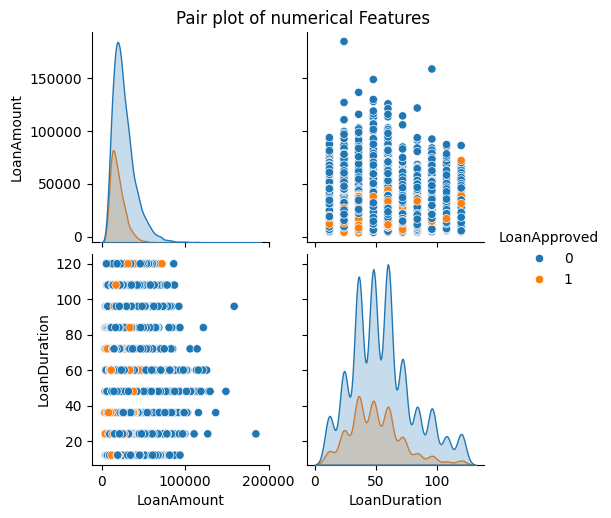

In [76]:
# Multivariate analysis : Pair plot for numerical features(Loan deatails)
sns.pairplot(loan_df[["LoanAmount","LoanDuration","LoanApproved"]],hue="LoanApproved")
plt.suptitle("Pair plot of numerical Features", y=1.02)
plt.show()

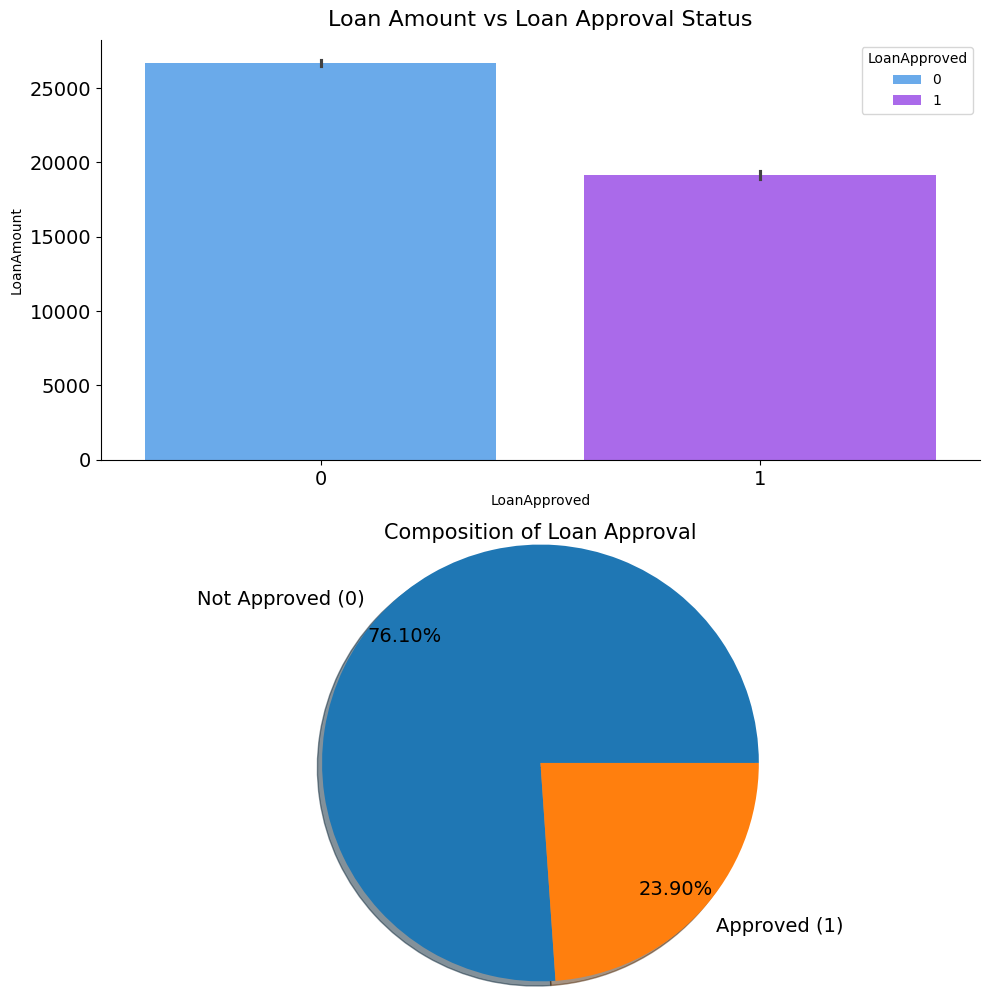

In [77]:
# from Chatgpt corrected

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots properly
plt.figure(figsize=(10,10))

# --- Subplot 1: Barplot ---
plt.subplot(2, 1, 1)
sns.barplot(
    x='LoanApproved',
    y='LoanAmount',
    data=loan_df,
    palette='cool',
    hue='LoanApproved'
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
plt.title('Loan Amount vs Loan Approval Status', fontsize=16, pad=10)

# --- Subplot 2: Pie chart ---
plt.subplot(2, 1, 2)
loan_approval_counts = loan_df['LoanApproved'].value_counts()
plt.pie(
    x=loan_approval_counts,
    labels = ['Not Approved (0)', 'Approved (1)'],
    autopct='%2.2f%%',
    pctdistance=0.85,
    shadow=True,
    radius=1.3,
    textprops={'fontsize':14}
)
plt.title('Composition of Loan Approval', fontsize=15, pad=10)

# Adjust layout
plt.tight_layout()
plt.show()

Text(0.5, 0, 'composition of LoanApproved')

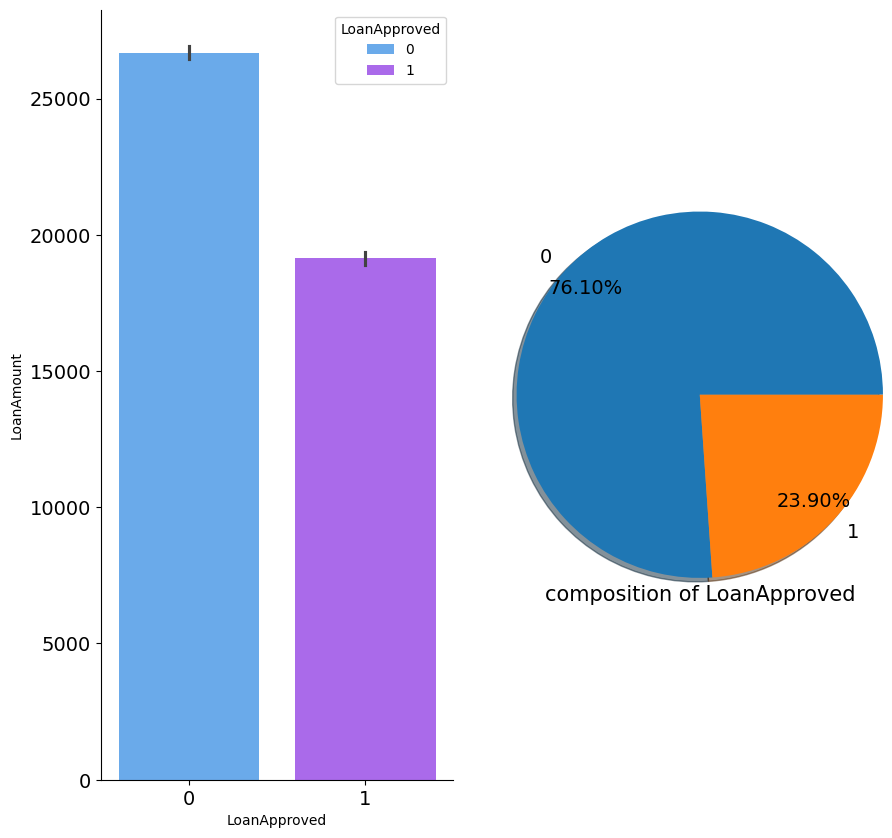

In [78]:
# original figsize changed from (14,7) to (10,10)

plt.figure(figsize=(10,10))

ax1=plt.subplot(1,2,1)
cp = sns.barplot(x='LoanApproved', y='LoanAmount', data=loan_df, palette='cool', hue='LoanApproved',)
ax1.set_xlabel("LoanApproved")
ax1.set_ylabel("LoanAmount")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

ax2=plt.subplot(1,2,2)
plt.pie(x=loan_df['LoanApproved'].value_counts(), labels=list(loan_df['LoanApproved'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.85,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('composition of LoanApproved', fontsize=15, labelpad=10)

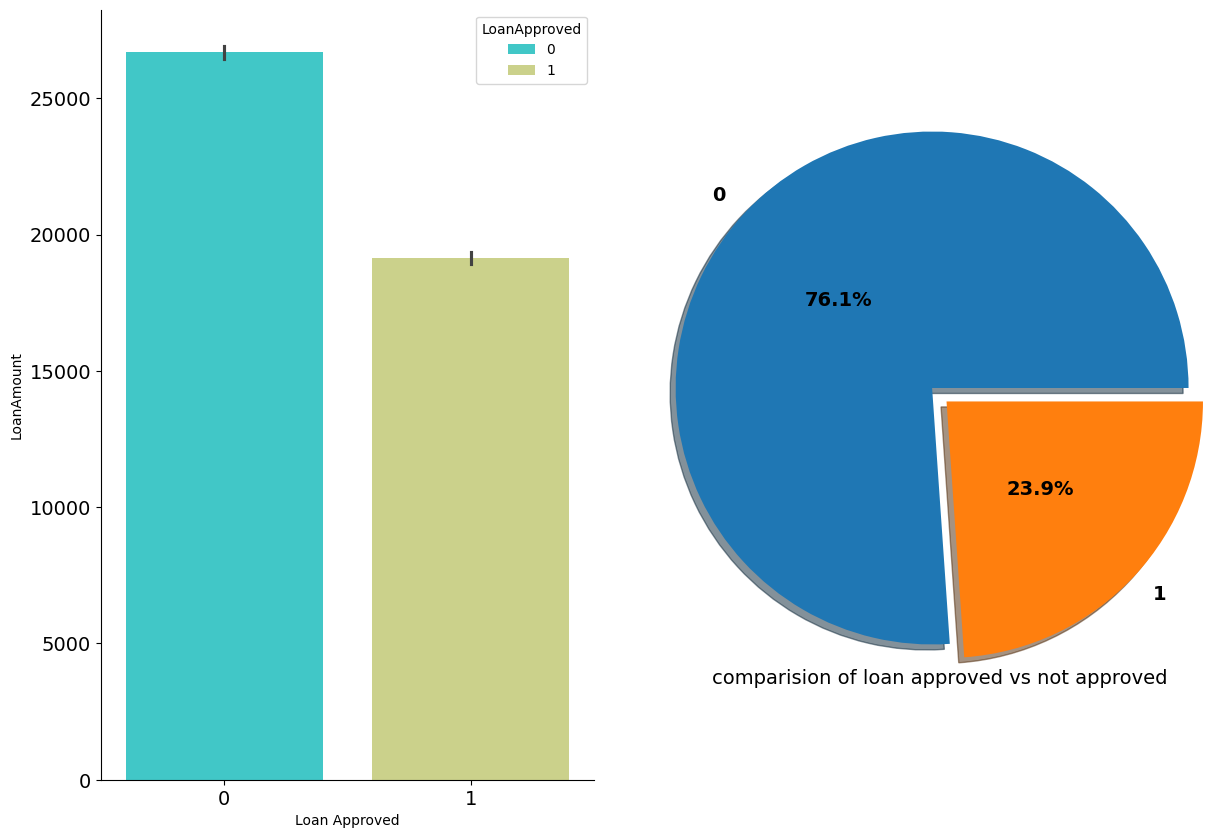

In [79]:
#chech the target
plt.figure(figsize=(14,10))
#barplot
ax1=plt.subplot(1,2,1)
cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=loan_df,palette='rainbow',hue='LoanApproved')
ax1.set_xlabel('Loan Approved')
ax1.set_ylabel('LoanAmount')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

#pie chart
ax2=plt.subplot(1,2,2)
plt.pie(loan_df['LoanApproved'].value_counts(),labels=list(loan_df['LoanApproved'].unique()),
                            autopct='%1.1f%%',explode=[0.05,0.05],shadow=True,pctdistance=0.5,
                            radius=1.3,textprops={'fontsize':14,'color':'black','weight':'bold'})
plt.xlabel('comparision of loan approved vs not approved',fontsize=14,labelpad=20)
plt.show()

## Data Cleaning

In [80]:
loan_df.isna().sum().sum()

0

In [81]:
loan_df.duplicated().sum()

0

In [82]:
loan_df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest


## FEATURE ENGINEERING


In [83]:
# column merged

loan_df["BankBalance"]=loan_df["SavingsAccountBalance"]+loan_df["CheckingAccountBalance"]

loan_df.drop("SavingsAccountBalance",axis=1,inplace=True)
loan_df.drop("CheckingAccountBalance",axis=1,inplace=True)

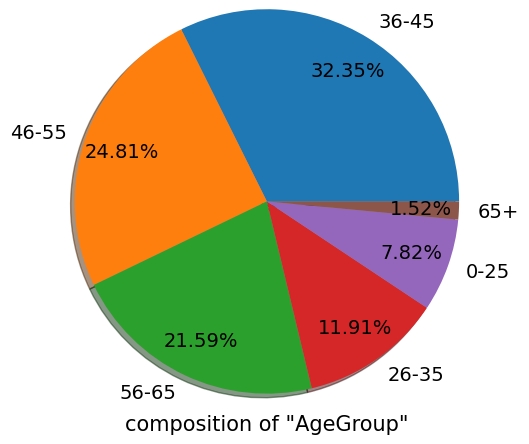

In [84]:
# Age Binning - to Categorize the age column

loan_df["AgeGroup"]=pd.cut(loan_df["Age"],bins=[0,25,35,45,55,65,100],
                           labels=["0-25","26-35","36-45","46-55","56-65","65+"])

plt.pie(x=loan_df["AgeGroup"].value_counts(),
labels=list(loan_df['AgeGroup'].unique()),
autopct="%2.2f%%",
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={"fontsize":14})
plt.xlabel('composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()


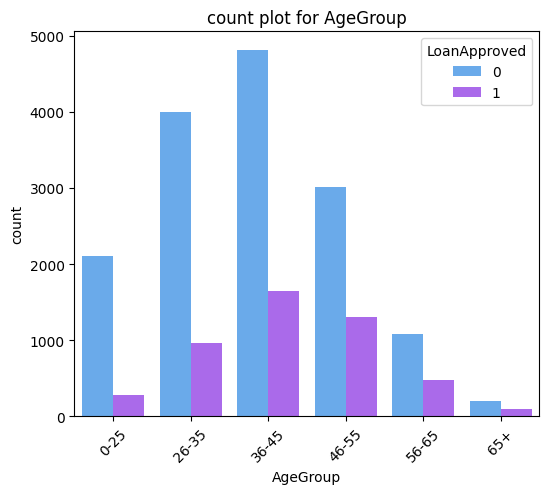

In [85]:
plt.figure(figsize=(6,5))
sns.countplot(data=loan_df,x=loan_df["AgeGroup"],hue="LoanApproved",palette="cool")
plt.title(f"count plot for AgeGroup")
plt.xlabel("AgeGroup")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

In [86]:
loan_df.drop("AgeGroup",axis=1,inplace=True)

In [87]:
loan_df[["year","month","day"]]=loan_df["ApplicationDate"].str.split("-",expand=True)

loan_df["year"]=loan_df["year"].astype(int)
loan_df["month"]=loan_df["month"].astype(int)
loan_df["day"]=loan_df["day"].astype(int)

loan_df[["ApplicationDate","year","month","day"]]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [88]:
loan_df["year"].max() # SO THE COLUMN contains wrong informations

2072

In [89]:
loan_df.drop(["ApplicationDate","year","month","day"],axis=1,inplace=True)

Encoding

In [90]:
categorical_columns = loan_df.select_dtypes(include=["object","category"]).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


## Ordinal Data
Many machine learning models, like decision trees and regression models, rely on the relative order of numeric values.By manually assiging meaningful numbers, the model can better capture the relationship between the ordinal categories.

In [91]:
loan_df["EmploymentStatus"].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [92]:
loan_df["EmploymentStatus"].nunique()  # To get the number of unique values

3

In [93]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

order=["Unemployed","Self-Employed","Employed"]
ordinal=OrdinalEncoder(categories=[order])
loan_df["EmploymentStatus"]=ordinal.fit_transform(loan_df[["EmploymentStatus"]])
loan_df["EmploymentStatus"].value_counts()

EmploymentStatus
2.0    17036
1.0     1573
0.0     1391
Name: count, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

order=["High School","Associate","Bachelor","Master","Doctorate"]
ordinal=OrdinalEncoder(categories=[order])
loan_df["EducationLevel"]=ordinal.fit_transform(loan_df[["EducationLevel"]])
loan_df["EducationLevel"].value_counts()

EducationLevel
2.0    6054
0.0    5908
1.0    4034
3.0    3050
4.0     954
Name: count, dtype: int64

## Nominal Data

In [95]:
le = LabelEncoder()
for cols in loan_df.select_dtypes("object").columns:
    loan_df[cols] = le.fit_transform(loan_df[cols])
    
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  float64
 4   EducationLevel              20000 non-null  float64
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int32  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int32  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## Data Transformation - Evaluvation

## Skewed Data

Histograms

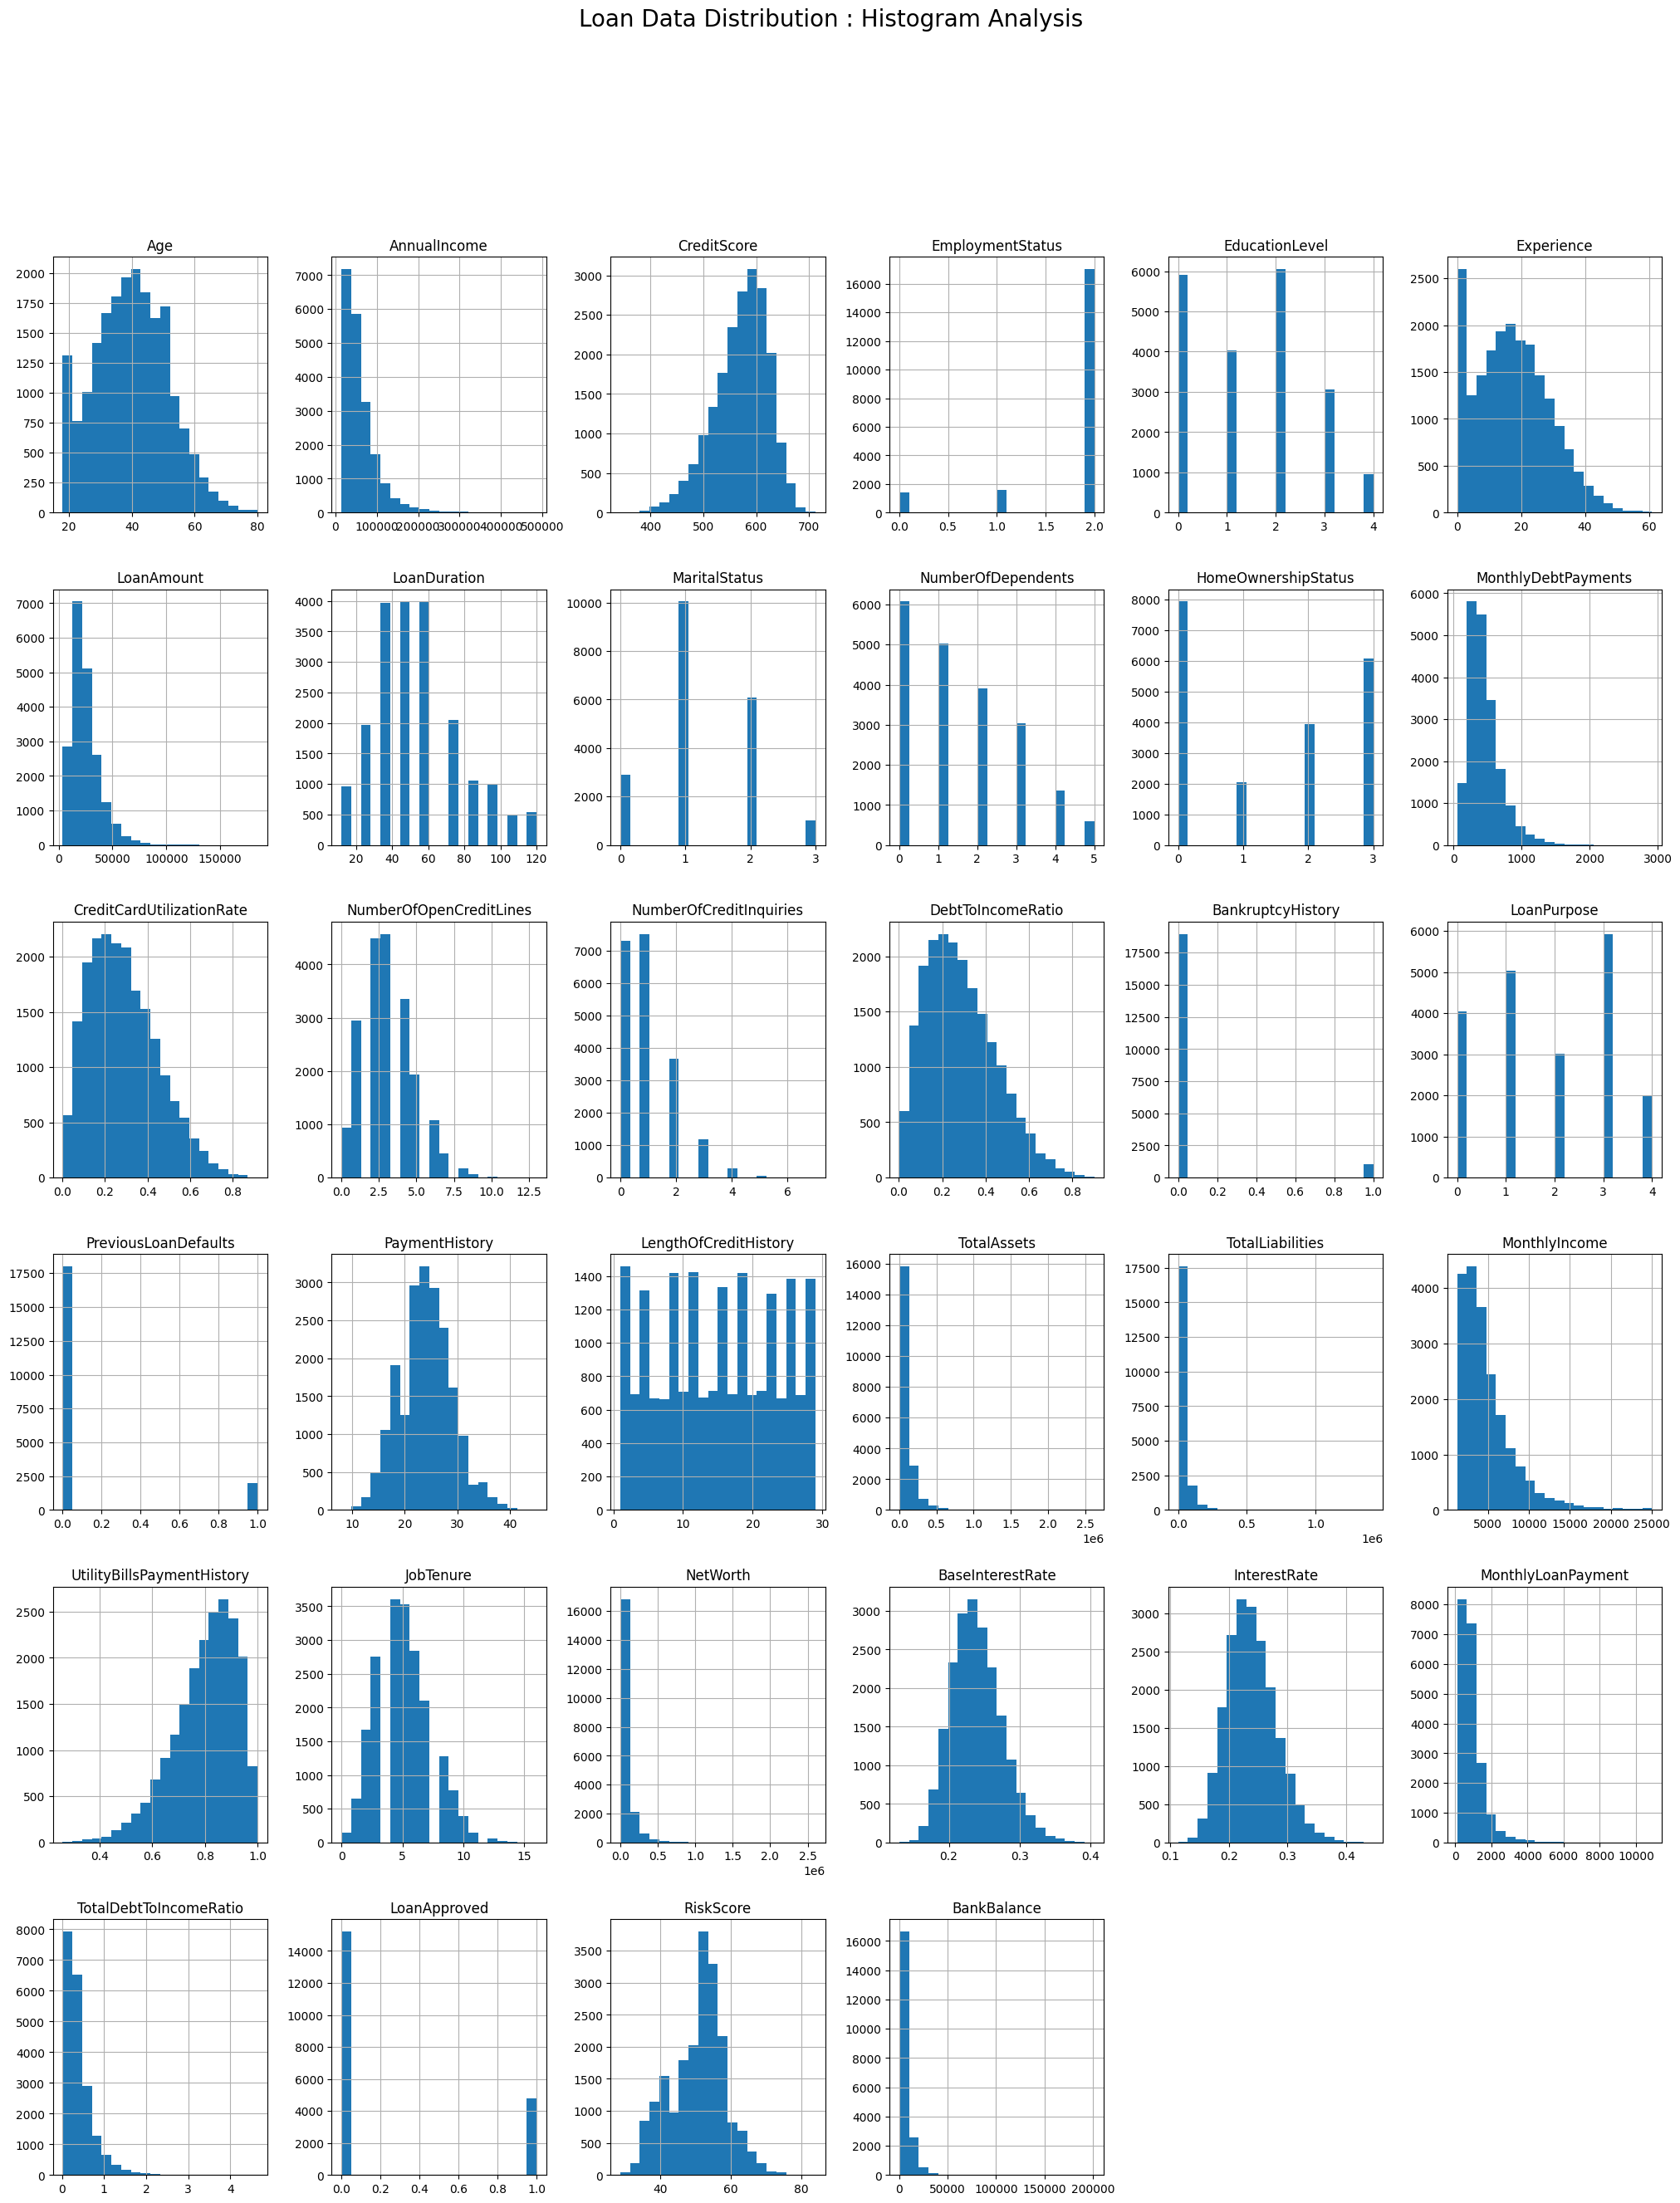

In [96]:
loan_df.hist(bins=20,figsize=(25,30))
plt.suptitle("Loan Data Distribution : Histogram Analysis",fontsize=20)
plt.show()

In [ ]:
# Calculate skewness for each column
skewness = loan_df.skew()

# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values
print(sorted_skewness) 

EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

The Log function in numpy stands for log(1+x), where "1p" refers to adding 1 to the input value before taking the logarithm

In [98]:
loan_df_copy = loan_df.copy()

# Log transformation of skewed columns 
loan_df["AnnualIncome"] = np.log1p(loan_df["AnnualIncome"])
loan_df["LoanAmount"] = np.log1p(loan_df["LoanAmount"])

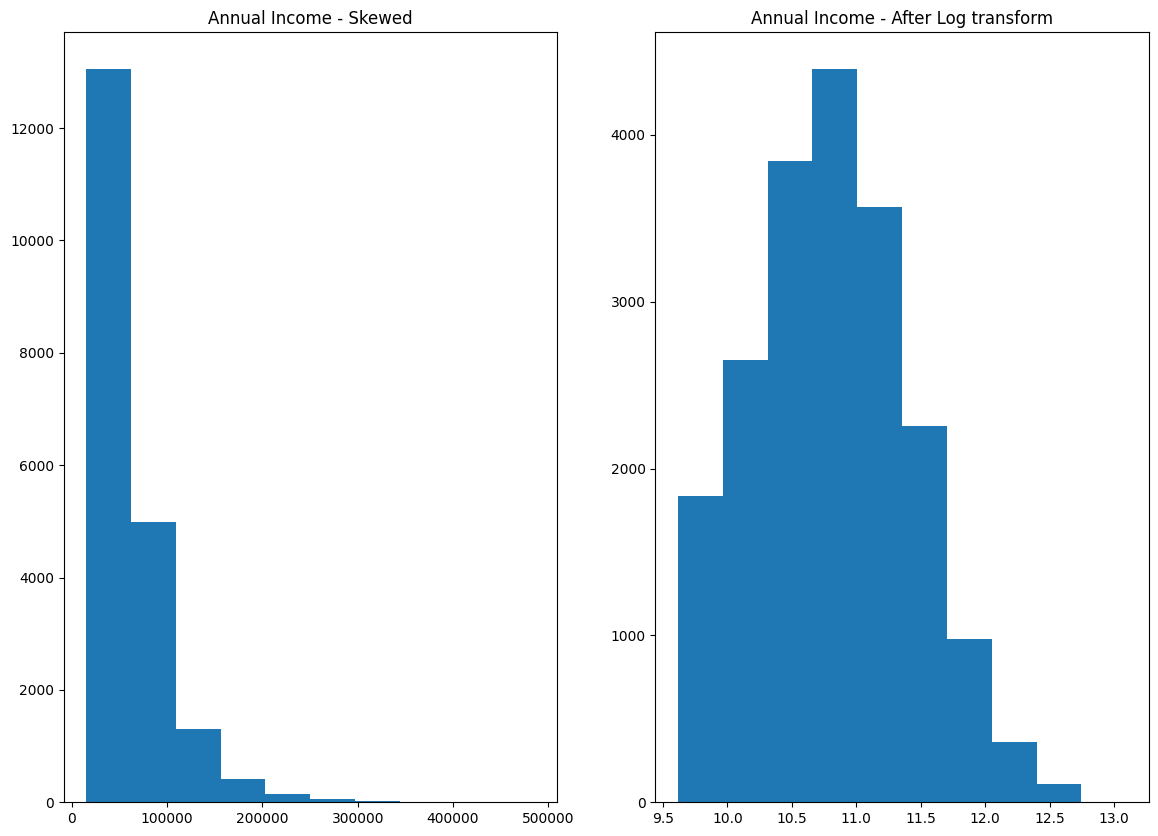

In [99]:
plt.figure(figsize=(14,10))

ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_copy["AnnualIncome"])
plt.title("Annual Income - Skewed")

ax2 = plt.subplot(1,2,2)
plt.hist(loan_df["AnnualIncome"])
plt.title("Annual Income - After Log transform")
plt.show()

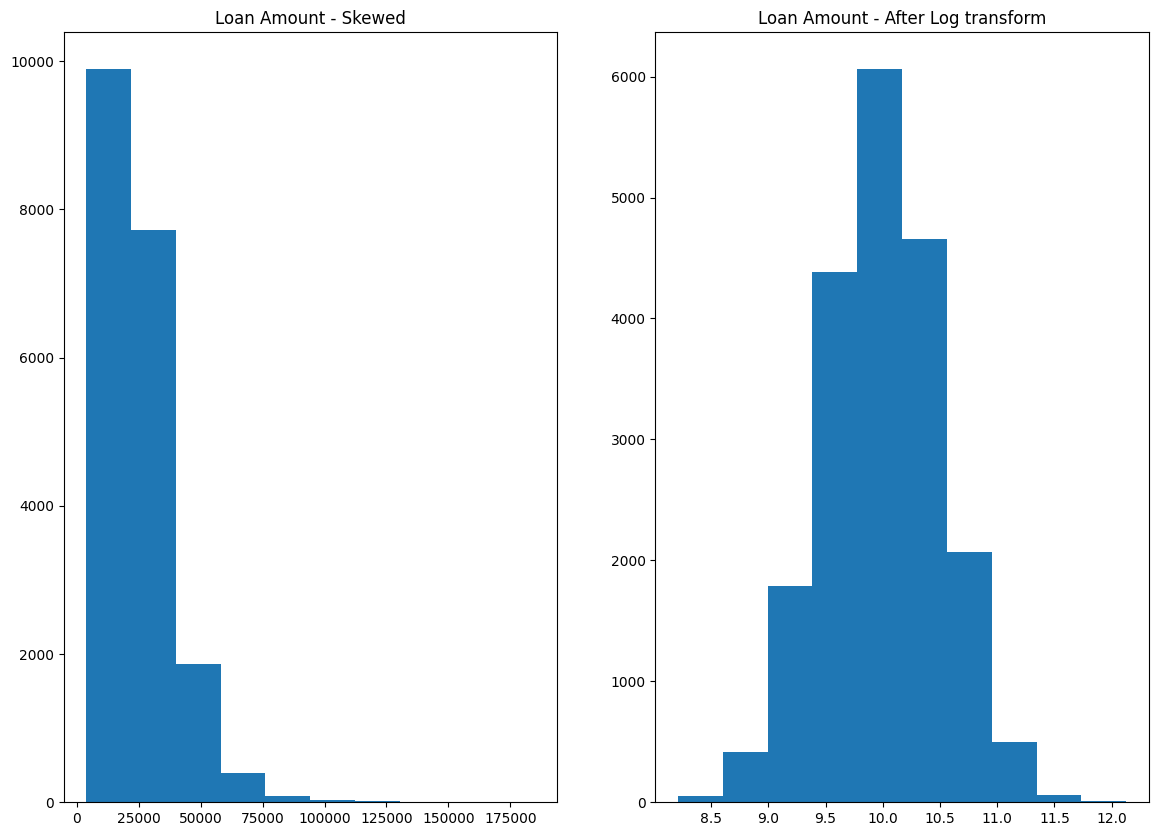

In [100]:
plt.figure(figsize=(14,10))

ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_copy["LoanAmount"])
plt.title("Loan Amount - Skewed")

ax2 = plt.subplot(1,2,2)
plt.hist(loan_df["LoanAmount"])
plt.title("Loan Amount - After Log transform")
plt.show()

In [101]:
numeric_columns = loan_df.drop(columns=["LoanApproved"]).select_dtypes(include=["number"])

skewness = numeric_columns.skew()

# Identify columns with skewness (threshold >+1 or < -1)
highly_skewed_columns = skewness[abs(skewness)>1].index

# Apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewed_columns:
    loan_df[col] = np.log1p(loan_df[col])
    
loan_df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,10.595359,617,1.098612,3.0,22,9.484405,48,1,2,...,0.724972,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476
1,38,10.589358,628,1.098612,1.0,15,10.167619,48,2,1,...,0.935132,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137
2,47,10.614597,570,1.098612,2.0,26,9.777244,36,1,2,...,0.872241,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492
3,58,11.143093,545,1.098612,0.0,34,10.542680,96,2,1,...,0.896155,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049
4,37,11.545054,594,1.098612,1.0,17,9.125327,36,1,1,...,0.941369,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234


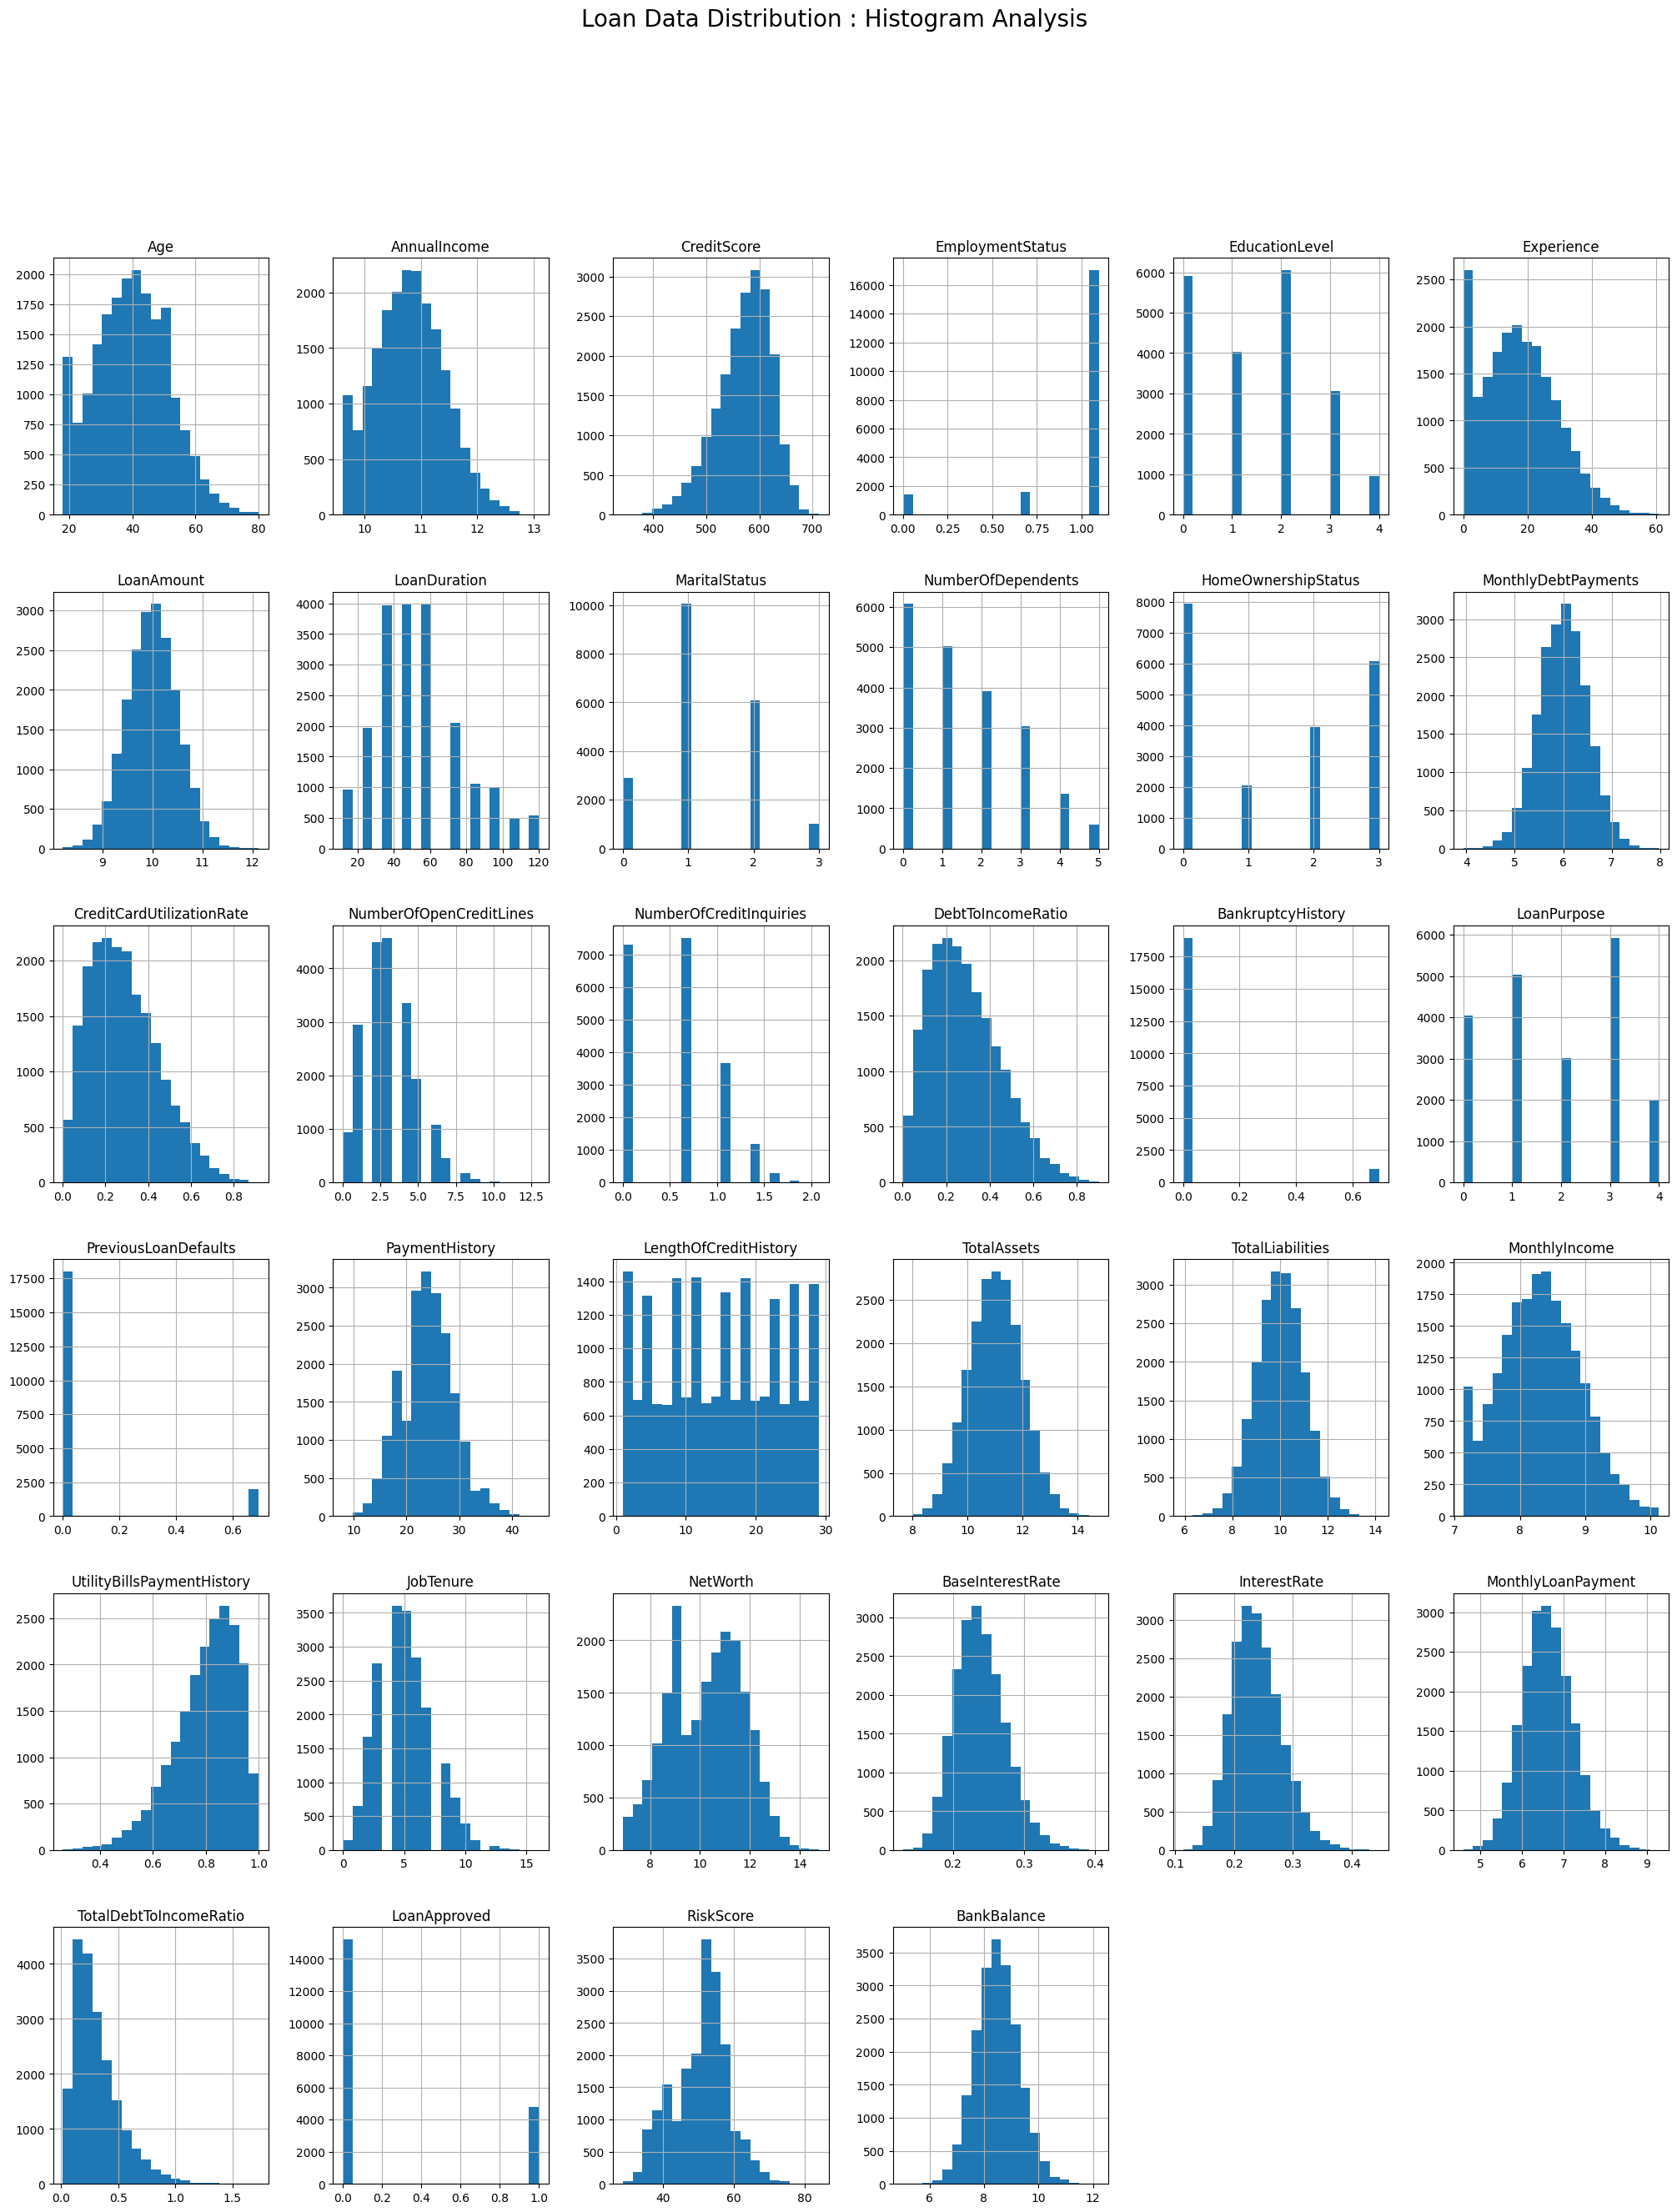

In [102]:
loan_df.hist(bins=20,figsize=(25,30))
plt.suptitle("Loan Data Distribution : Histogram Analysis",fontsize=20)
plt.show()

## Removing Unwanted features 

Based on Correlation

After analysing the correlations you can remove:
One among two Highly correlated features (between features themselves)
Features with low correlation with the target variable.

<Axes: >

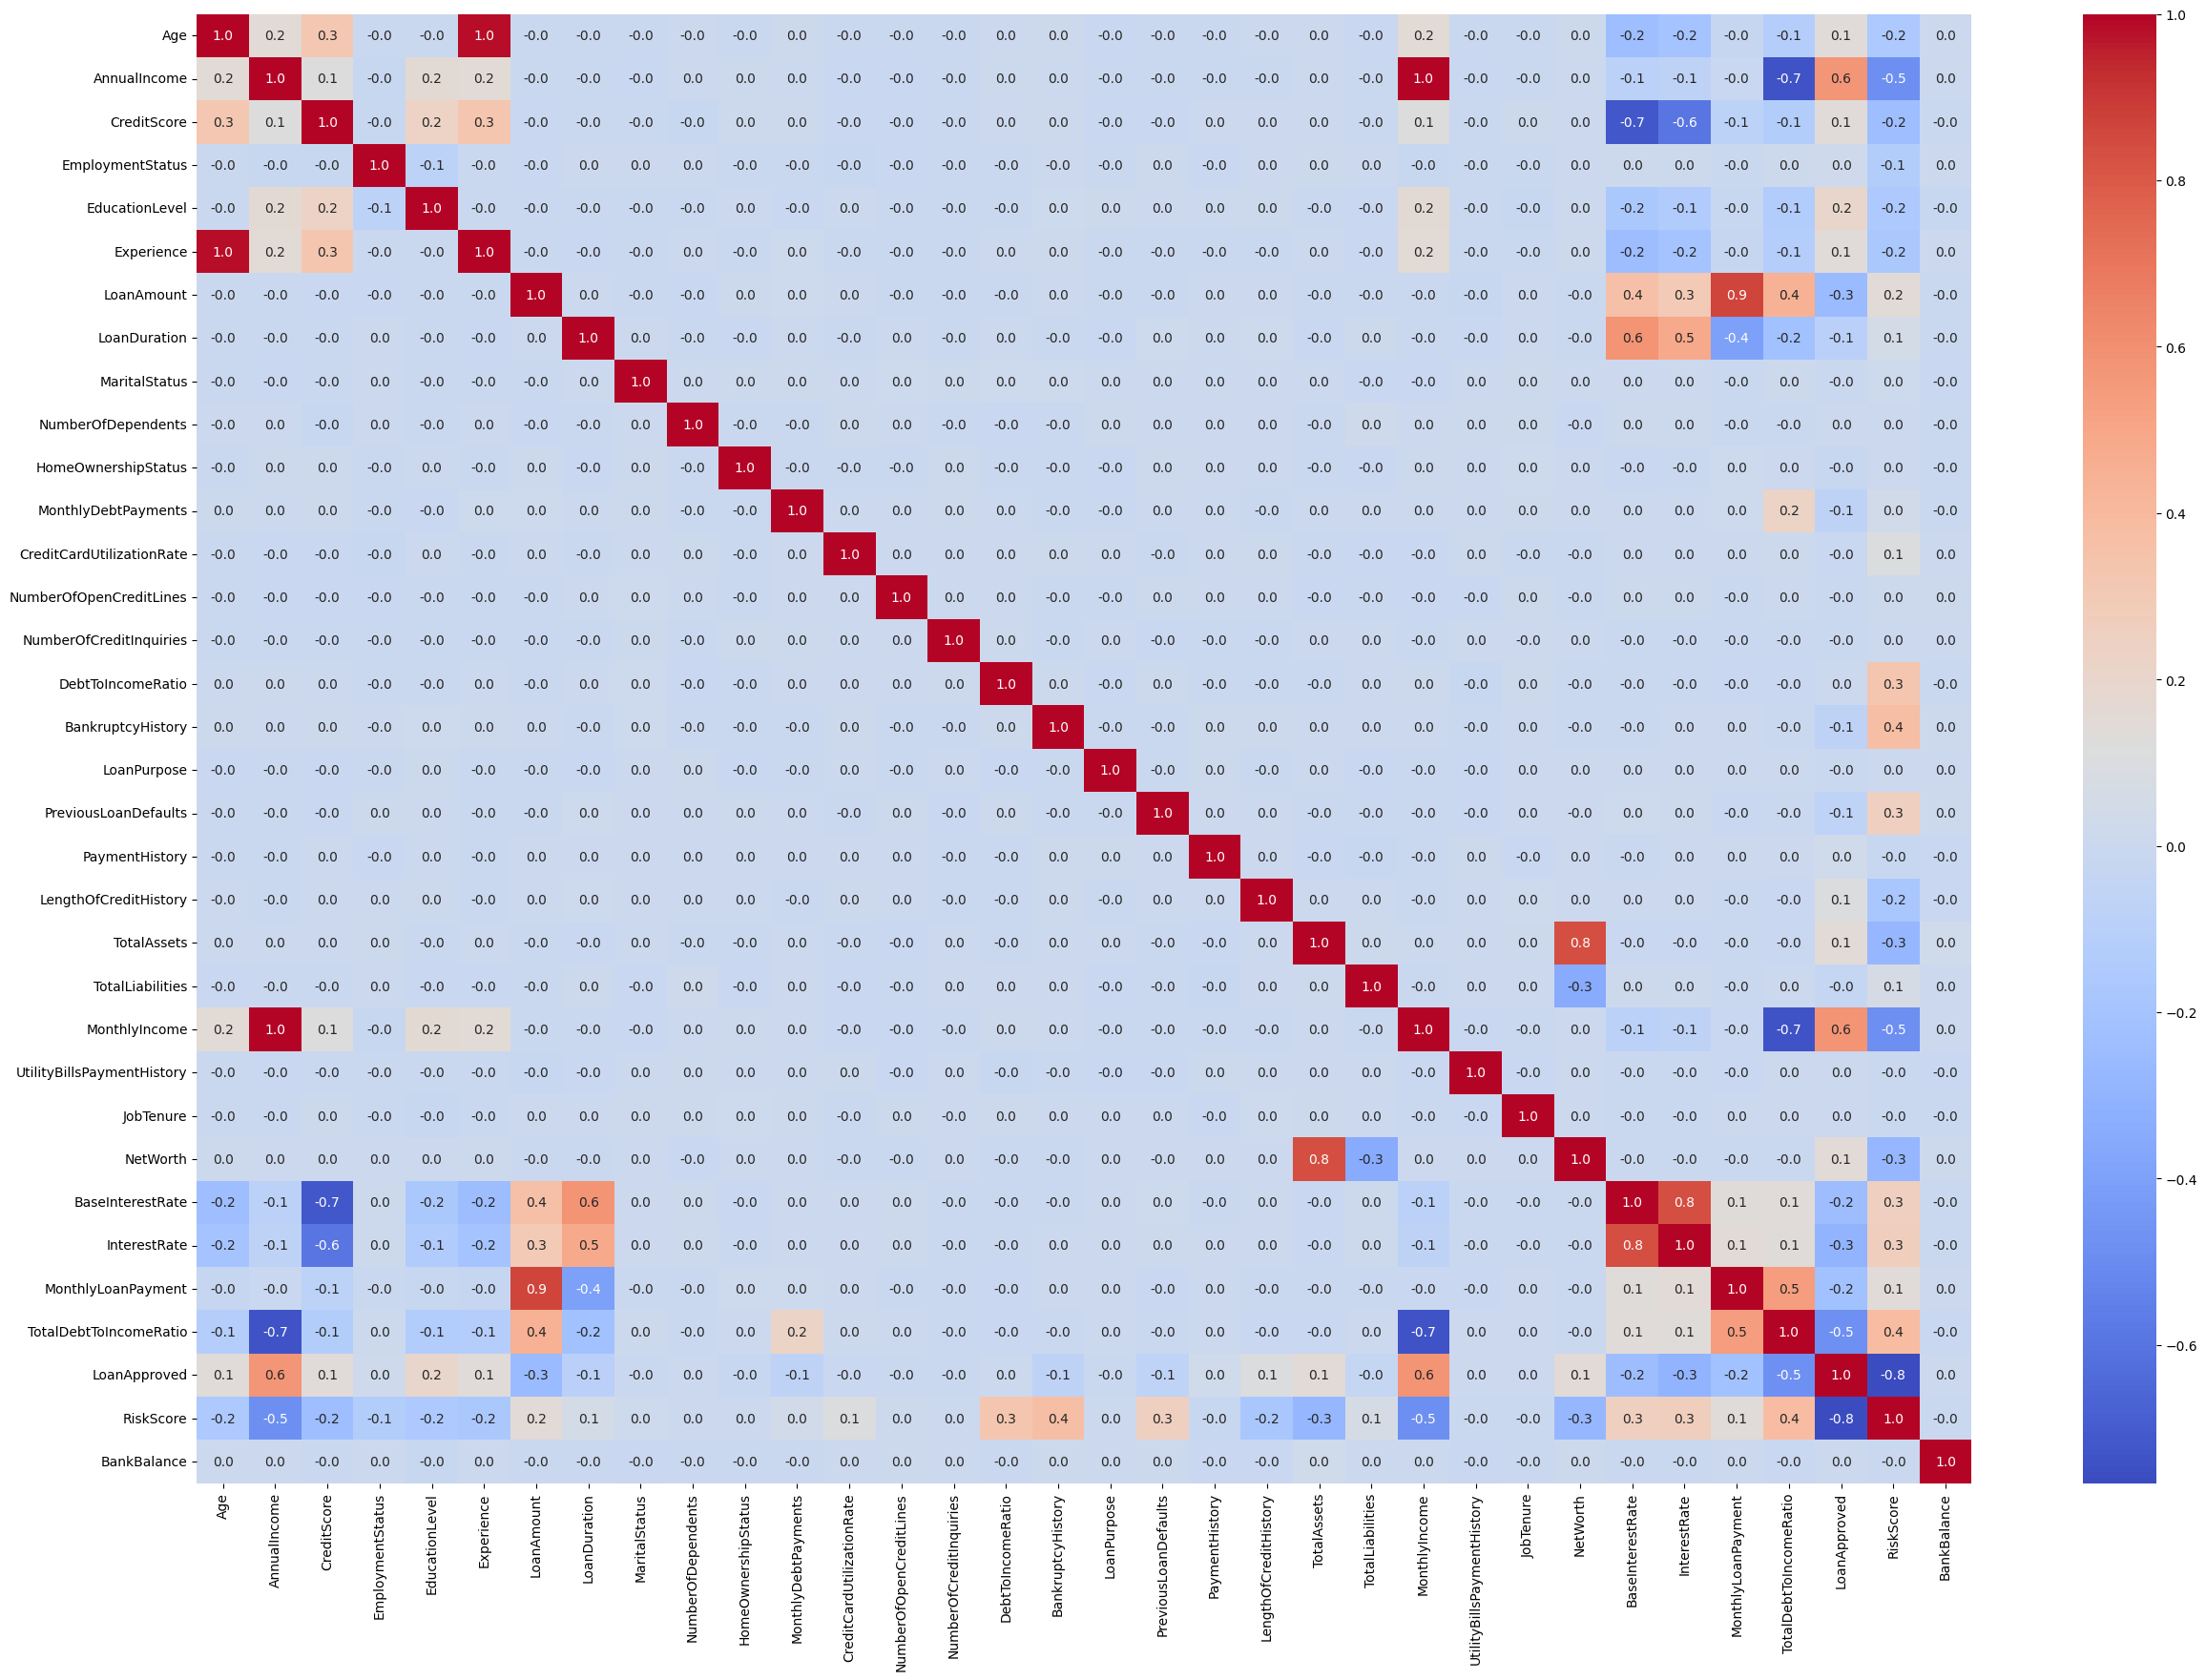

In [103]:
plt.figure(figsize=(30,20))
loan_df.corr(numeric_only=True)
sns.heatmap(loan_df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt="0.01f")

In [104]:
loan_df.corr()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
Age,1.000000,0.156663,0.323243,-0.002852,-0.001970,0.982980,-0.005580,-0.006992,-0.005489,-0.000287,...,-0.005601,-0.000773,0.006656,-0.238995,-0.202702,-0.027758,-0.123050,0.141029,-0.164304,0.005178
AnnualIncome,0.156663,1.000000,0.117193,-0.015064,0.159894,0.158160,-0.005187,-0.001902,-0.008096,0.001024,...,-0.011695,-0.001671,0.003253,-0.087288,-0.075183,-0.010119,-0.733132,0.577045,-0.484203,0.005291
CreditScore,0.323243,0.117193,1.000000,-0.016420,0.230306,0.327664,-0.009231,-0.000762,-0.000507,-0.014453,...,-0.006838,0.008069,0.001043,-0.722619,-0.598844,-0.080825,-0.125033,0.142000,-0.240198,-0.005228
EmploymentStatus,-0.002852,-0.015064,-0.016420,1.000000,-0.081362,-0.002586,-0.010498,0.000028,0.002613,0.003093,...,-0.001483,-0.005920,0.005386,0.007858,0.007840,-0.006754,0.007624,0.024961,-0.130817,0.005587
EducationLevel,-0.001970,0.159894,0.230306,-0.081362,1.000000,-0.001128,-0.000765,-0.002447,-0.001940,-0.004994,...,-0.002146,-0.016901,0.001854,-0.167695,-0.139859,-0.015631,-0.133575,0.194434,-0.164848,-0.015996
Experience,0.982980,0.158160,0.327664,-0.002586,-0.001128,1.000000,-0.005393,-0.007924,-0.004426,0.000136,...,-0.006603,-0.000762,0.006633,-0.242871,-0.206252,-0.027939,-0.123991,0.140755,-0.166496,0.006080
LoanAmount,-0.005580,-0.005187,-0.009231,-0.010498,-0.000765,-0.005393,1.000000,0.000126,-0.005475,-0.009104,...,-0.015043,0.001044,-0.002563,0.360816,0.302460,0.862680,0.444596,-0.259575,0.151177,-0.002476
LoanDuration,-0.006992,-0.001902,-0.000762,0.000028,-0.002447,-0.007924,0.000126,1.000000,0.003906,-0.001301,...,-0.010105,0.003635,-0.005524,0.579215,0.487994,-0.404565,-0.218800,-0.094558,0.054550,-0.006214
MaritalStatus,-0.005489,-0.008096,-0.000507,0.002613,-0.001940,-0.004426,-0.005475,0.003906,1.000000,0.000954,...,0.000731,0.006668,0.005394,0.002563,0.003604,-0.005142,0.008430,-0.006828,0.016824,-0.011145
NumberOfDependents,-0.000287,0.001024,-0.014453,0.003093,-0.004994,0.000136,-0.009104,-0.001301,0.000954,1.000000,...,0.008735,0.010910,-0.009468,0.006977,0.006749,-0.005865,-0.002420,0.001717,0.001686,-0.002764


In [105]:
loan_df[["TotalDebtToIncomeRatio","MonthlyIncome"]].corr()

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [106]:
loan_df.drop("TotalDebtToIncomeRatio",axis=1,inplace=True)

In [107]:
correlation_matrix = loan_df.corr()

threshold = 0.5

# Find pairs of features with high correlation
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],
                                            correlation_matrix.columns[j]))
            
# print all Pairs of highly correlated features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


Features with a correlation value of 0.5 or higher (+ / -) should be considered for removal, as they are highly correlated

In [108]:
loan_df.drop(["Experience","AnnualIncome","TotalAssets","BaseInterestRate","MonthlyLoanPayment"],axis=1,inplace=True)

In [109]:
# calculate the correlation of each feature with the target
corr_with_target = loan_df.corr()["LoanApproved"].sort_values(ascending=False)

# Set the threshold for low correlation (-0.05 to 0.05)
low_corr_features = corr_with_target[(corr_with_target > -0.05) &
                                     (corr_with_target < 0.05)]

print("Features with correlation between -0.05 and 0.05 :")
print(low_corr_features)

Features with correlation between -0.05 and 0.05 :
PaymentHistory                0.030804
EmploymentStatus              0.024961
JobTenure                     0.004997
BankBalance                   0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [110]:
loan_df.drop(["JobTenure","UtilityBillsPaymentHistory","NumberOfDependents","DebtToIncomeRatio",
         "NumberOfOpenCreditLines","NumberOfCreditInquiries","MaritalStatus","LoanPurpose"],axis=1,inplace=True)

For Target : Riskscore

In [111]:
# calculate the correlation of each feature with the target
corr_with_target = loan_df.corr()["RiskScore"].sort_values(ascending=False)

# Set the threshold for low correlation (-0.05 to 0.05)
low_corr_features = corr_with_target[(corr_with_target > -0.05) &
                                     (corr_with_target < 0.05)]

print("Features with correlation between -0.05 and 0.05 :")
print(low_corr_features)

Features with correlation between -0.05 and 0.05 :
MonthlyDebtPayments    0.037533
HomeOwnershipStatus    0.004454
BankBalance           -0.001408
PaymentHistory        -0.016992
Name: RiskScore, dtype: float64


In [112]:
loan_df.drop(["MonthlyDebtPayments","HomeOwnershipStatus","PaymentHistory","BankBalance"],axis=1,inplace=True)

In [113]:
loan_df.drop(["LoanDuration","EducationLevel","Age"],axis=1,inplace=True)

## PCA

PCA reduces the number of features (dimentions) in a dataset

Principal Components : These are the new features created by PCA. Each principal component is a linear combination of the Original features, and they are ranked based on the amount of variance they explain in the data.

In [114]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)  # You can change the number of components to retain
loan_pca = pca.fit_transform(loan_df)

# Create a Data Frame with the PCA results
loan_pca_df = pd.DataFrame(loan_pca,
                           columns=[f"PC{i+1}" for i in range(loan_pca.shape[1])])

# Now loan_pca_final_df contains the original data along with the PCA componenets
loan_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,45.415168,-5.118133,-3.169741,1.365916,0.452133
1,56.295083,-6.876061,-0.186502,0.848532,-0.549209
2,-1.650936,5.432465,4.699554,-2.103498,1.017684
3,-26.719513,-5.348505,-0.664767,1.748307,-0.831976
4,22.939609,17.472947,-6.044662,1.258010,0.367145


## Scaling : Standardization

$$x`=\frac{x-\mu}{\sigma}$$

Example = $x=b^2*3$

$$\Sigma$$

In [115]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler


# Copy
loan_Scaled_df = loan_df.copy()

numeric_columns = loan_df.drop(columns=["LoanApproved"]).select_dtypes(include=["number"]).columns

# Initialize the Standard Scaler
scaler = StandardScaler()  # use MinMaxScaler and RobustScaler as appropriately

loan_Scaled_df[numeric_columns] = scaler.fit_transform(loan_df[numeric_columns])
loan_Scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


## Handling Outliers

Boxplots

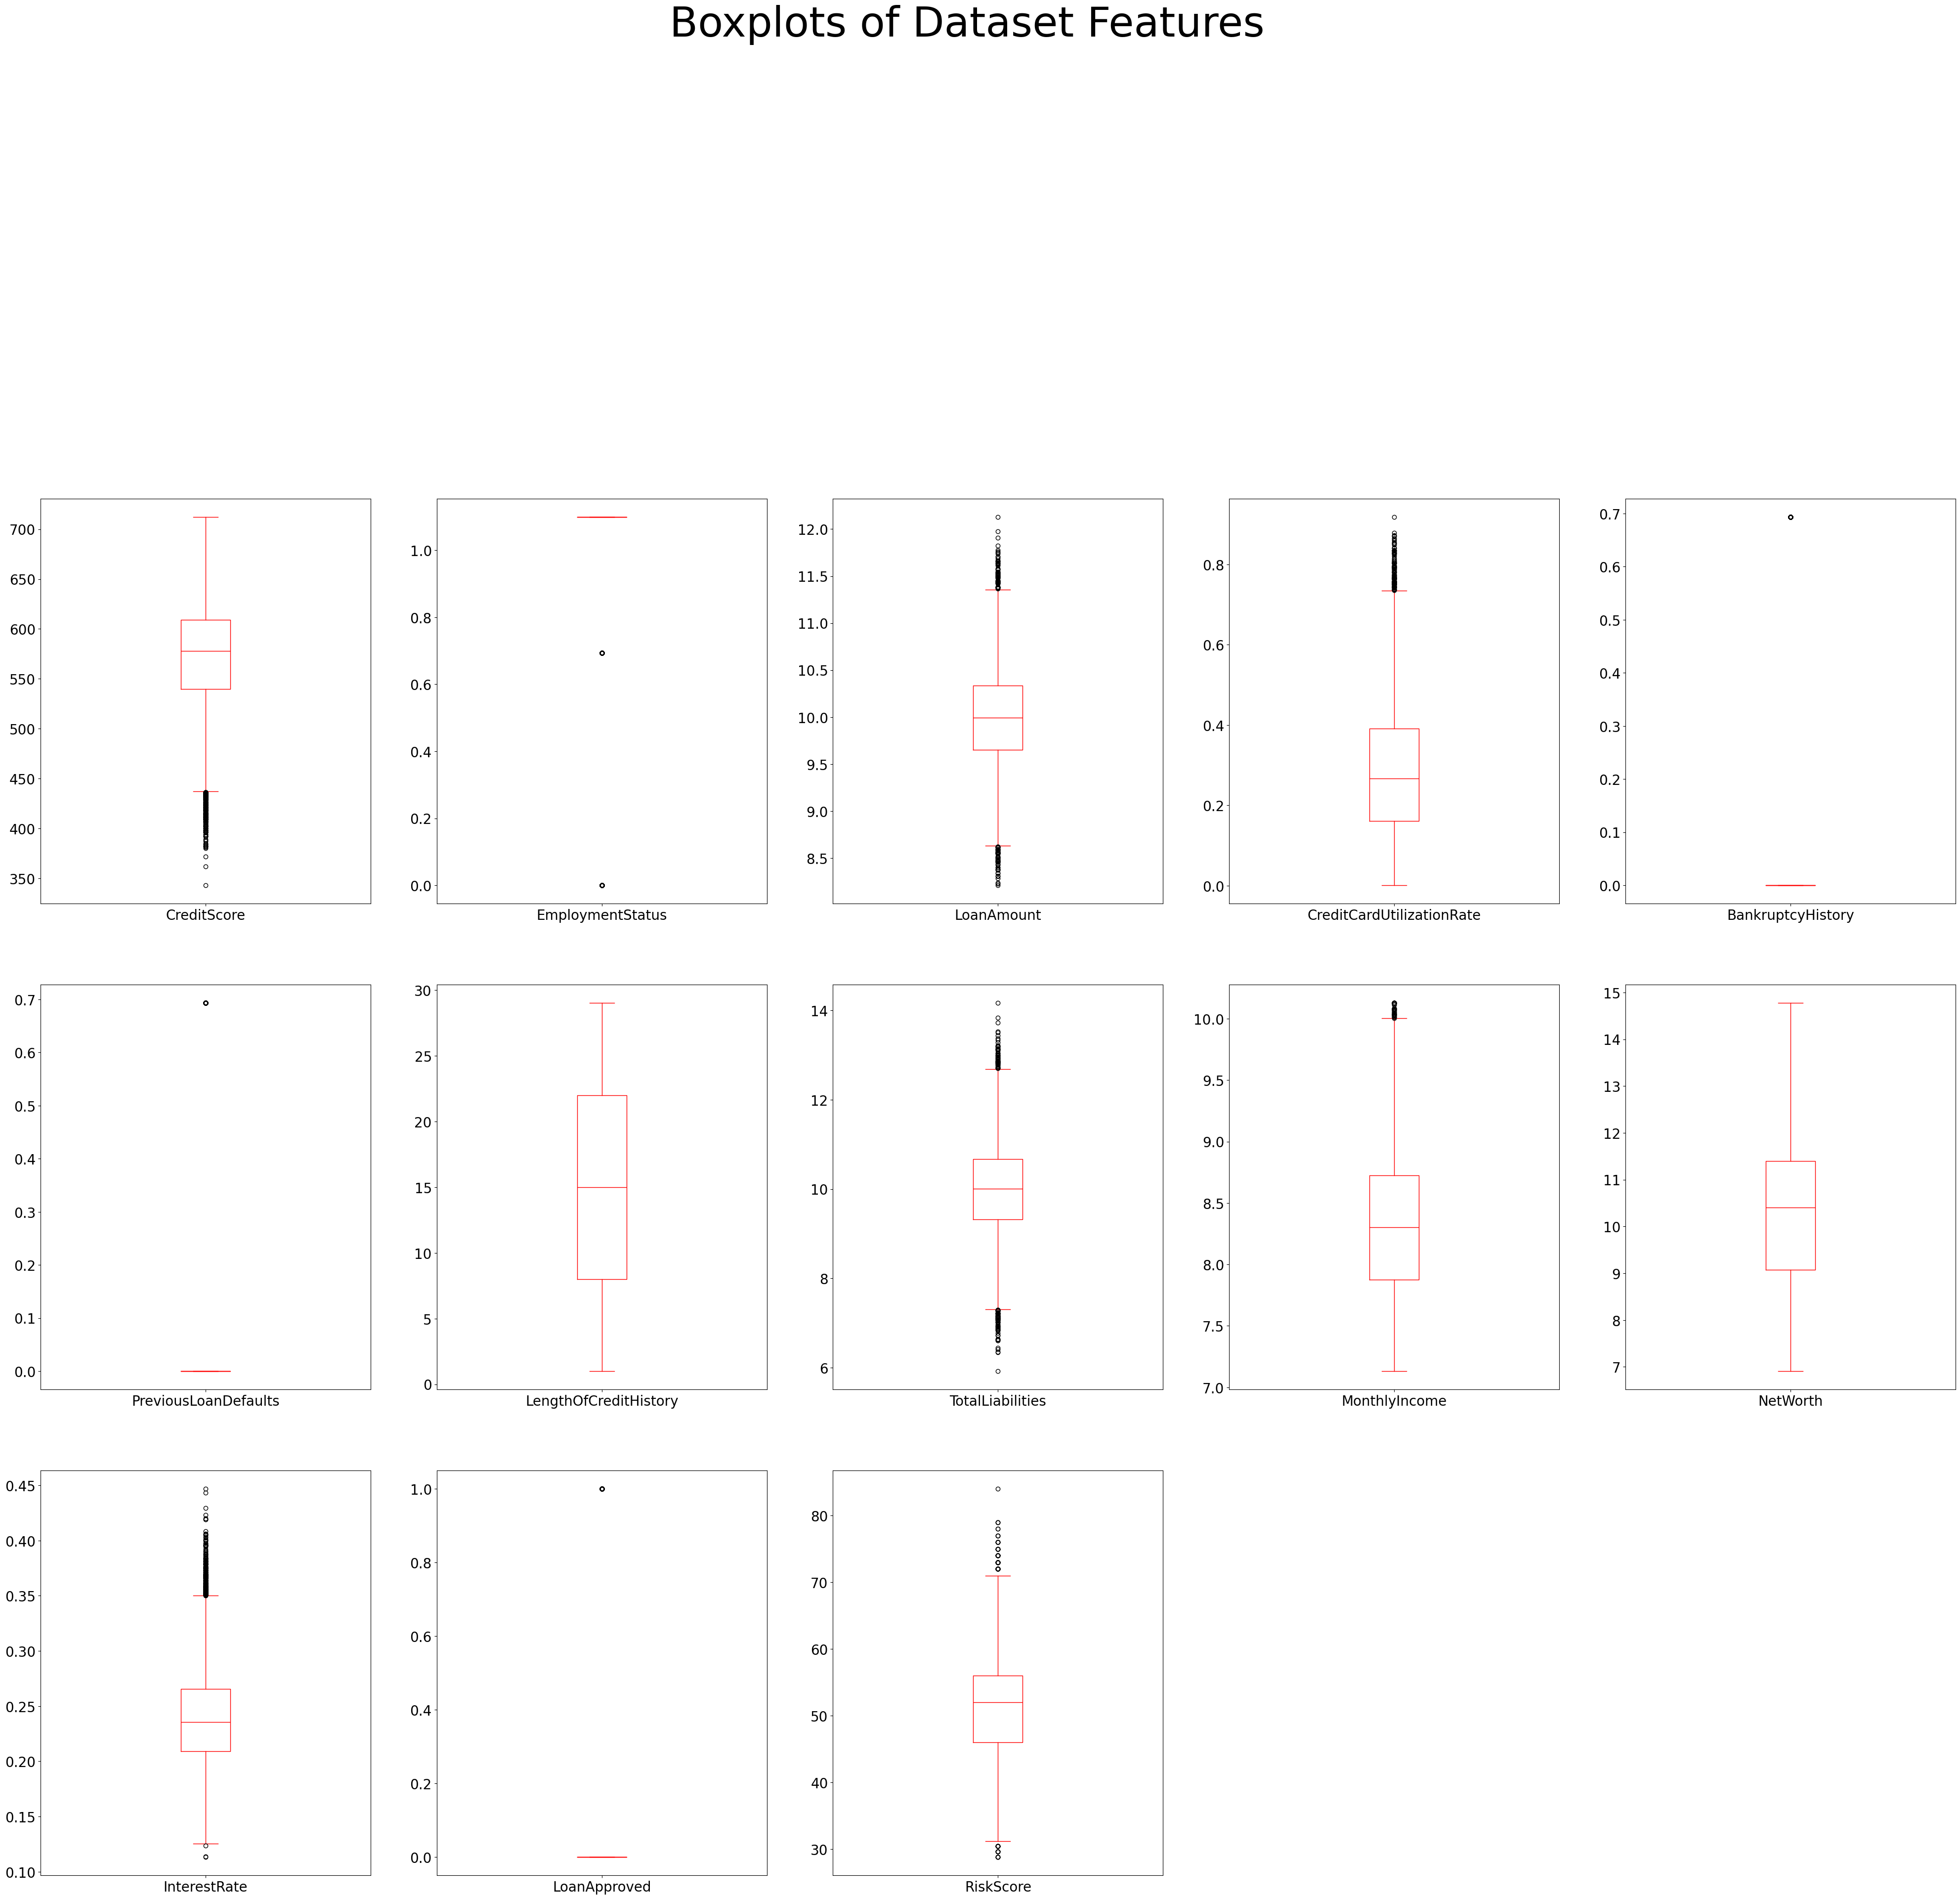

In [116]:
loan_df.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red",fontsize=20)
plt.suptitle("Boxplots of Dataset Features", fontsize=60)
plt.show()


## Removing Outliers

In [117]:
# Copy
loan_df_copy = loan_df.copy()

def remove_outliers_iqr(df,exclude_columns):
    for column in df.select_dtypes(include=["number"]):
        if column in exclude_columns:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # Filter out the outliers
        df = df[(df[column] >=lower_bound) & (df[column] <=upper_bound)]
        
    return df

# Define  the columns to exclude
exclude_columns = ["LoanApproved","RiskScore","EmploymentStatus"]

# Remove Outliers
loan_df = remove_outliers_iqr(loan_df,exclude_columns)

# Print shapes of data before and after removing outliers
print("Shape of data before removing outilers :", loan_df_copy.shape)
print("Shape of data after removing outliers :",loan_df.shape)
print("Number of outliers removed :", loan_df_copy.shape[0]-loan_df.shape[0])

Shape of data before removing outilers : (20000, 13)
Shape of data after removing outliers : (16305, 13)
Number of outliers removed : 3695


## Classification Modelling
Binary Loan Approval Classification : To determine the binary outcome of loan approval, indicating whether an applicant id likely to be approved or denied for a loan.

In [118]:
# Convert "LoanApproved" from float to int
loan_df["LoanApproved"]= loan_df["LoanApproved"].astype(int)

x=loan_df.drop(["LoanApproved","RiskScore"],axis=1)
y=loan_df[["LoanApproved"]]

In [119]:
loan_df[['LoanApproved']].value_counts()

LoanApproved
0               12104
1                4201
Name: count, dtype: int64

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print("Shape of Training Features :",x_train.shape)
print("Shape of Testing Features :",x_test.shape)
print("Shape of Training Target :",y_train.shape)
print("Shape of Test Target :",y_test.shape)



Shape of Training Features : (13044, 11)
Shape of Testing Features : (3261, 11)
Shape of Training Target : (13044, 1)
Shape of Test Target : (3261, 1)


In [121]:
model =LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


# Accuracy
acc=accuracy_score(y_test,y_pred)
print("Accuracy :",acc)

# Confusion Matrix
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

# Detailed Classification Report
print("\Classification Report:\n", classification_report(y_test,y_pred))



Accuracy : 0.8767249310027599

Confusion Matrix:
 [[2239  170]
 [ 232  620]]
\Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2409
           1       0.78      0.73      0.76       852

    accuracy                           0.88      3261
   macro avg       0.85      0.83      0.84      3261
weighted avg       0.87      0.88      0.88      3261



<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:15: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Pc\AppData\Local\Temp\ipykernel_14452\126417401.py:15: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report:\n", classification_report(y_test,y_pred))
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

In [122]:
! pip install lightgbm
! pip install xgboost
! pip install naive_bayes
! pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [123]:
# for data importing
import pandas as pd
import numpy as np

# for viz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler
#fro evalution
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

#models
#for classification algorithams
from sklearn.linear_model import LogisticRegression #ith classification thanne ann regretion alla

#models
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# fro classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from sklearn import model_selection

# from sklearn.utils import class_weight
# from sklearn.model_selection import KFold

from sklearn.linear_model  import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import sklearn.svm
import sklearn.tree

In [124]:
clas_models={"lr":LogisticRegression(max_iter=500),
             "rfc":RandomForestClassifier(),
             "dtc":DecisionTreeClassifier(),
             "knn":KNeighborsClassifier(n_neighbors=11),
             "svm":SVC(kernel="linear"),
             "gbc":GradientBoostingClassifier(random_state=0,learning_rate=0.45),
             "etc":ExtraTreesClassifier(),
             "nb":GaussianNB()}

In [125]:
y_test["LoanApproved"].value_counts()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 12391 to 4518
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LoanApproved  3261 non-null   int32
dtypes: int32(1)
memory usage: 38.2 KB


In [137]:
#dictionary to store results
results={"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[]}

#evaluate each model:
for model_name,model in clas_models.items():
    #train the model :
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)
    # print(model_pred)
    # calcualate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    # store result in dictionary
    results["model"].append(model)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1"].append(f1)
    
    # convert resulyts to dataframe
results_df=pd.DataFrame(results)

    #Display the results in a table 
results_df.style.background_gradient('Reds')

C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pc\AppData\Local\Packages

,model,accuracy,precision,recall,f1
0,LogisticRegression(max_iter=500),0.914137,0.853086,0.811033,0.831528
1,RandomForestClassifier(),0.925483,0.888889,0.816901,0.851376
2,DecisionTreeClassifier(),0.886845,0.787843,0.775822,0.781786
3,KNeighborsClassifier(n_neighbors=11),0.760503,0.640316,0.190141,0.293213
4,SVC(kernel='linear'),0.921496,0.864303,0.829812,0.846707
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.925790,0.875616,0.834507,0.854567
6,ExtraTreesClassifier(),0.921803,0.898531,0.789906,0.840725
7,GaussianNB(),0.903097,0.867123,0.742958,0.800253


In [127]:
loan_df["LoanApproved"].value_counts()

LoanApproved
0    12104
1     4201
Name: count, dtype: int64

In [128]:
loan_Scaled_df

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.301741,0.371144,0.223258,-1.158361,-0.235154,-0.333426,-0.950540,0.152909,-0.786044,0.450659,-1.031559,0,0.544251
19996,-0.090446,0.371144,0.325628,1.160510,-0.235154,-0.333426,1.558018,-1.371843,0.020190,0.550691,-0.946394,0,0.415684
19997,1.439083,0.371144,1.042114,-0.436731,-0.235154,-0.333426,-0.831085,-1.551261,0.010532,0.881882,-0.292475,0,-0.741415
19998,-0.227712,0.371144,-0.784919,0.490501,-0.235154,-0.333426,-0.233810,-0.649116,-0.280562,-0.684159,0.610430,0,1.058517


## scaled data

In [129]:
x2s=loan_Scaled_df.drop(["LoanApproved","RiskScore"],axis=1)
y2s=loan_Scaled_df[["LoanApproved"]]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)

#dictionary to store results
results={"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[]}


#evaluate each model:
for model_name,model in clas_models.items():
    #train the model :
    model.fit(x2s_train,y2s_train)
    model_pred2s=model.predict(x2s_test)
    # print(model_pred)
    # calcualate metrics
    accuracy=accuracy_score(y2s_test,model_pred2s)
    precision=precision_score(y2s_test,model_pred2s)
    recall=recall_score(y2s_test,model_pred2s)
    f1=f1_score(y2s_test,model_pred2s)

    # store result in dictionary
    results["model"].append(model)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1"].append(f1)
    
    # convert resulyts to dataframe
results_df2=pd.DataFrame(results)

    #Display the results in a table 
result_df2=results_df2.sort_values(by="accuracy",ascending=False)


#display with background gradient
result_df2.style.background_gradient(cmap="Blues")

C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

,model,accuracy,precision,recall,f1
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.935000,0.887410,0.852507,0.869609
0,LogisticRegression(max_iter=500),0.927750,0.881551,0.826942,0.853374
1,RandomForestClassifier(),0.926750,0.896930,0.804326,0.848108
4,SVC(kernel='linear'),0.926250,0.882415,0.819076,0.849567
6,ExtraTreesClassifier(),0.926000,0.913892,0.782694,0.843220
3,KNeighborsClassifier(n_neighbors=11),0.897750,0.896867,0.675516,0.770611
2,DecisionTreeClassifier(),0.889250,0.789899,0.768928,0.779273
7,GaussianNB(),0.880500,0.756422,0.781711,0.768859


In [130]:
print(type(y2s_train))
print(y2s_train.shape)

<class 'pandas.core.frame.DataFrame'>
(16000, 1)


## Regression Modelling
Risk Score Regression : To predict a continuous risk score associated with each individual 's likelihood of loan default or financial instability

In [131]:
x1=loan_df.drop(["RiskScore","LoanApproved"],axis=1)
y1=loan_df[["RiskScore"]]


In [132]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,random_state=42,test_size=0.2)

print("Shape of the Training Features :",x1_train.shape)
print("Shape of the Testing Features :",x1_test.shape)
print("Shape of the Training Target :",y1_train.shape)
print("Shape of the Testing  Target :",y1_test.shape)

Shape of the Training Features : (13044, 11)
Shape of the Testing Features : (3261, 11)
Shape of the Training Target : (13044, 1)
Shape of the Testing  Target : (3261, 1)


In [133]:
models = {
    "Linear_Regression" : LinearRegression(),
    "RandomForest_Regressor" : RandomForestRegressor(),
    "GradientBoosting_Regressor" :GradientBoostingRegressor(),
    "DecisionTree_Regressor" : DecisionTreeRegressor(),
    "SVM" : SVR(),
    
    # "MLP_Regressor" : MLPRegressor(max_iter=500),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "ExtraTreesRegressor" : ExtraTreesRegressor(),
    "BaggingRegressor" : BaggingRegressor(),
    "LGBMRegressor" : LGBMRegressor(),
    
    # "CatBoostRegressor" : CatBoostRegressor(),
    "XGBRFRegressor" : XGBRegressor()
}

In [138]:
# Dictionary to store results
results = {"Model" :[],"MSC":[],"MAE" :[],"R2":[]}

# Loop through the models, train them, and calculate the metrics
for model_name , model in models.items():
    # Train the model
    model.fit(x1_train,y1_train)
    
    # Make predictions
    y1_pred = model.predict(x1_test)
    
    # Calculate metrics
    mse = mean_squared_error(y1_test,y1_pred)
    mae = mean_absolute_error(y1_test,y1_pred)
    r2 = r2_score(y1_test,y1_pred)
    
    # Score results in the dictionary
    results["Model"].append(model_name)
    results["MSC"].append(mse)
    results["MAE"].append(mae)
    results["R2"].append(r2)
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Display the results
results_df.style.background_gradient('Reds')


C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 13044, number of used features: 9
[LightGBM] [Info] Start training from score 49.358709


,Model,MSC,MAE,R2
0,Linear_Regression,19.757093,3.606333,0.590212
1,RandomForest_Regressor,14.058251,2.935162,0.708413
2,GradientBoosting_Regressor,13.546080,2.910170,0.719037
3,DecisionTree_Regressor,28.308924,3.965839,0.412836
4,SVM,44.996741,5.203862,0.066709
5,AdaBoostRegressor,22.225272,3.783108,0.539019
6,ExtraTreesRegressor,13.709401,2.932690,0.715649
7,BaggingRegressor,15.119294,3.021355,0.686406
8,LGBMRegressor,13.126148,2.870621,0.727747
9,XGBRFRegressor,14.624620,3.015597,0.696666


## Regression On Scaled Data

In [141]:
x1s=loan_Scaled_df.drop(["LoanApproved","RiskScore"],axis=1)
y1s=loan_Scaled_df[["RiskScore"]]

x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

#dictionary to store results
results = {"Model" :[],"MSC":[],"MAE" :[],"R2":[]}

# Loop through the models, train them, and calculate the metrics
for model_name , model in models.items():
    # Train the model
    model.fit(x1s_train,y1s_train)
    
    # Make predictions
    y1s_pred = model.predict(x1s_test)
    
    # Calculate metrics
    mse = mean_squared_error(y1s_test,y1s_pred)
    mae = mean_absolute_error(y1s_test,y1s_pred)
    r2 = r2_score(y1s_test,y1s_pred)
    
    # Score results in the dictionary
    results["Model"].append(model_name)
    results["MSC"].append(mse)
    results["MAE"].append(mae)
    results["R2"].append(r2)
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Display the results
results_df.style.background_gradient('viridis')


C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 11
[LightGBM] [Info] Start training from score 0.009876


,Model,MSC,MAE,R2
0,Linear_Regression,0.352483,0.480010,0.656539
1,RandomForest_Regressor,0.241711,0.382562,0.764475
2,GradientBoosting_Regressor,0.236644,0.384859,0.769413
3,DecisionTree_Regressor,0.489755,0.525728,0.522780
4,SVM,0.245773,0.391908,0.760518
5,AdaBoostRegressor,0.412226,0.518651,0.598325
6,ExtraTreesRegressor,0.235791,0.380821,0.770244
7,BaggingRegressor,0.263220,0.397671,0.743517
8,LGBMRegressor,0.222196,0.374619,0.783492
9,XGBRFRegressor,0.245330,0.391041,0.760950


## Final Report

Based on the analysis of the loan approval dataset for predicting the "RiskScore", the LGBMRegressor (and GradientBoosting_Regressor) model demonstrated the best performance among the tested models.

Based on the Evaluvation of the classification models for predicting "LoanApproval" , ExtraTreesClassifier emerged as the best-performing model.it achieved the highest accuracy, consistently strong results across precision, recall, and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.

## To Save Model
pickle file

In [136]:
import pickle 

# Save the regression model 
r_model = GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open("regression_model.pkl","wb") as file:
    pickle.dump(r_model,file)
    
# Save the Classification model
c_model = GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open("classification_model.pkl","wb") as file:
    pickle.dump(c_model, file)